# Lab 4: Coordinates

In [1]:
import numpy as np
import ugradio
from ugradio.timing import nch
import time
from __future__ import division
import astropy
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from itertools import chain
from scipy import signal
import scipy

## Test Galactic Coordinates (l,b) = (120, 0)

In [2]:
from ugradio import leo

In [19]:
test_gal = SkyCoord(120, 0, frame='galactic', unit='deg')
test_icrs = test_gal.transform_to('icrs')
test_ra = test_icrs.ra.degree
test_dec = test_icrs.dec.degree
test_alt, test_az = ugradio.coord.get_altaz(test_ra, test_dec, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
print 'RA and declination:', test_ra, test_dec
print 'Altitude and Azimuth:', test_alt, test_az

RA and declination: 6.45083113624 62.725726754
Altitude and Azimuth: 45.5860601983 324.565723692


## North Celestial Pole Coordinates

l = (105 to 160)

b = (15 to 50)

Note: telescope range -- altitude(14 to 85), azimuth(5 to 355)

In [37]:
l = np.arange(105, 160, 2)
b = np.arange(15, 50, 2)

ra_dec = []

for i in range(len(l)):
    for j in range(len(b)):
        galactic = SkyCoord(l[i], b[j], frame='galactic', unit='deg')
        icrs = galactic.transform_to('icrs')
        ra = icrs.ra.degree
        dec = icrs.dec.degree
        ra_dec.append([ra, dec])
        
np.savez('ra_dec_ncp', ra_dec)

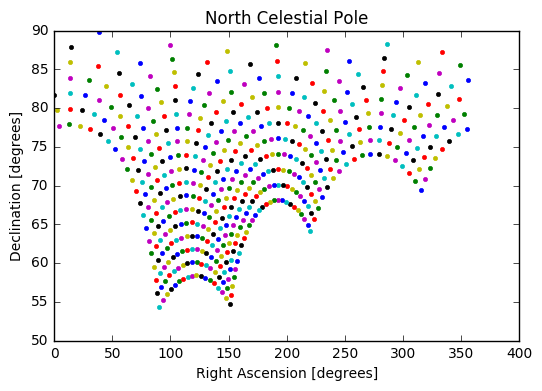

In [27]:
for i in range(len(ra_dec)):
    plt.plot(ra_dec[i][0], ra_dec[i][1], '.')
    plt.title('North Celestial Pole')
    plt.xlabel('Right Ascension [degrees]')
    plt.ylabel('Declination [degrees]')
plt.show()

### Section 1: l (105 to 160), b (35 to 50)

Observation completed on April 19, 2019 ~6 pm

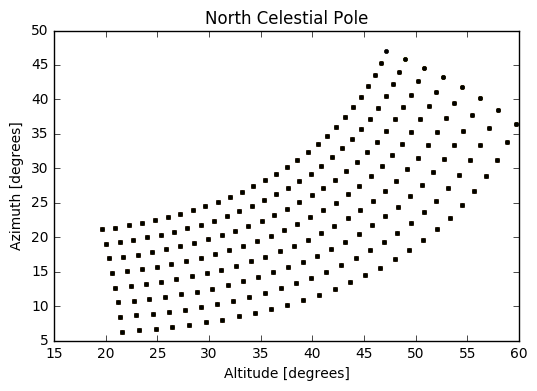

In [45]:
# April 19, 2019 -- 17:24

l = np.arange(105, 160, 2)
b = np.arange(35, 50, 2)

ra_dec = []

for i in range(len(l)):
    for j in range(len(b)):
        galactic = SkyCoord(l[i], b[j], frame='galactic', unit='deg')
        icrs = galactic.transform_to('icrs')
        ra = icrs.ra.degree
        dec = icrs.dec.degree
        ra_dec.append([ra, dec])
        
alt = []
az = []
      
for i in range(len(ra_dec)):
    alt_, az_ = ugradio.coord.get_altaz(ra_dec[i][0], ra_dec[i][1], lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
    alt.append(alt_)
    az.append(az_)
    plt.plot(alt, az, '.')
    plt.title('North Celestial Pole')
    plt.xlabel('Altitude [degrees]')
    plt.ylabel('Azimuth [degrees]')
plt.show()


## Predicting NCP Location

In [3]:
def jd():
    unix_t = time.time()
    t = astropy.time.Time(unix_t, format='unix')
    return t.jd

In [15]:
hr = 1/24

In [4]:
# Thursday, April 25, 2019

jd0 = 2458598.79167
jd2 = 2458598.87500
jd4 = 2458598.95833
jd6 = 2458599.04167
jd8 = 2458599.12500
jd10 = 2458599.20833
jd11 = 2458599.25000
jd12 = 2458599.29167
jd13 = 2458599.33333
jd14 = 2458599.37500
jd16 = 2458599.45833
jd18 = 2458599.54167
jd20 = 2458599.62500
jd22 = 2458599.70833
jd24 = 2458599.79167

In [5]:
def ncp_predict(l1, l2, b1, b2, jd):
    l = np.arange(l1, l2, 2)
    b = np.arange(b1, b2, 2)

    ra_dec = []

    for i in range(len(l)):
        for j in range(len(b)):
            galactic = SkyCoord(l[i], b[j], frame='galactic', unit='deg')
            icrs = galactic.transform_to('icrs')
            ra = icrs.ra.degree
            dec = icrs.dec.degree
            ra_dec.append([ra, dec])

    alt = []
    az = []

    for i in range(len(ra_dec)):
        alt_, az_ = ugradio.coord.get_altaz(ra_dec[i][0], ra_dec[i][1], jd=jd, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
        alt.append(alt_)
        az.append(az_)
        plt.plot(alt, az, '.')
        plt.title('North Celestial Pole')
        plt.xlabel('Altitude [degrees]')
        plt.ylabel('Azimuth [degrees]')
    plt.show()

### Section 2: l (131 to 160), b (15 to 34)

Observe between 11:00 am to 1:00 pm

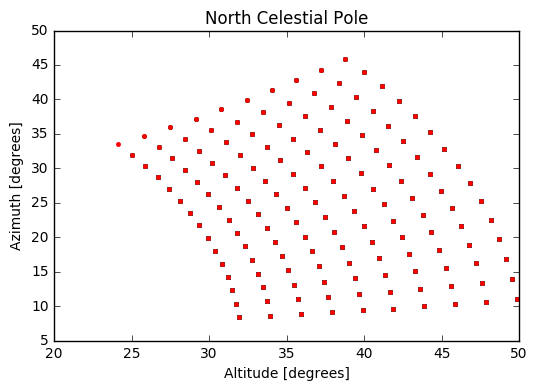

In [52]:
ncp_predict(131, 160, 15, 34, jd12) # 12:00 4/25/19

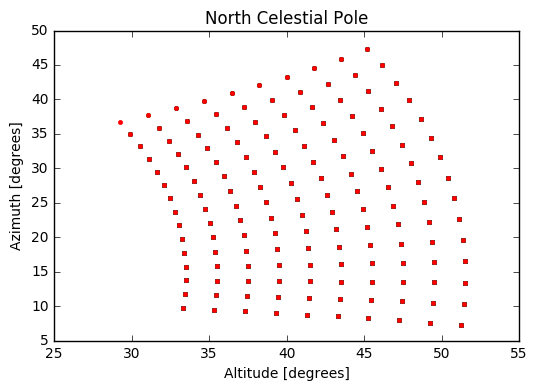

In [41]:
ncp_predict(131, 160, 15, 34, jd()) # current time

### Section 3: l (105 to 114), b (15 to 34)

Observe between ~10:30 am and 1:00 pm

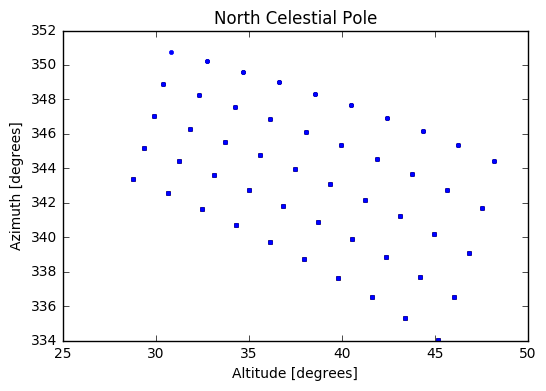

In [46]:
ncp_predict(105, 114, 15, 34, jd12) # 12:00 4/25/19

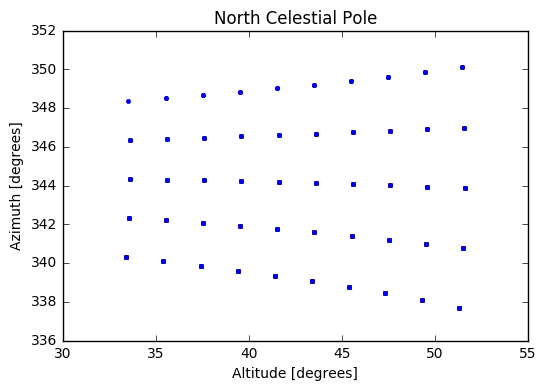

In [7]:
ncp_predict(105, 114, 15, 34, jd()) # current time

### Section 4: l (115 to 130), b (15 to 22)

Observe between 5:00 pm and 6:00 pm

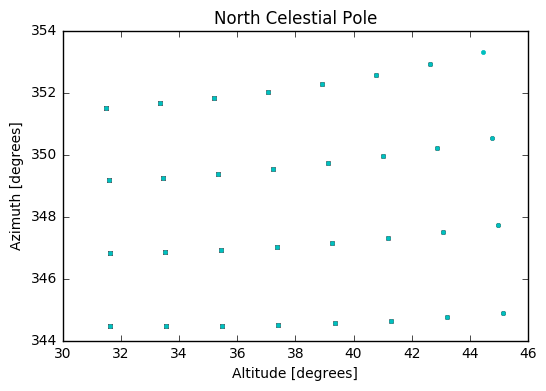

In [82]:
ncp_predict(115, 130, 15, 22, jd0 + 17*hr) # 00:00 + hour(s) 4/25/19

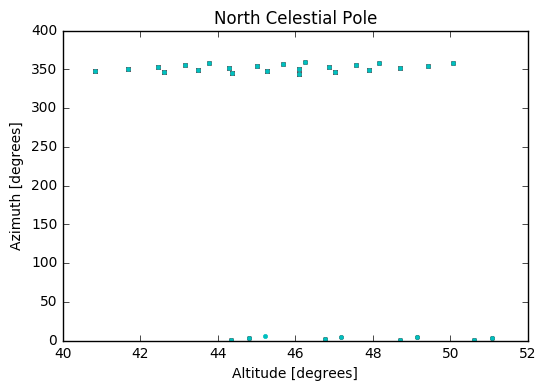

In [61]:
ncp_predict(115, 130, 15, 22, jd()) # current time

### Section 5: l (115 to 130), b (23 to 34)

Might need to split into even smaller ranges.

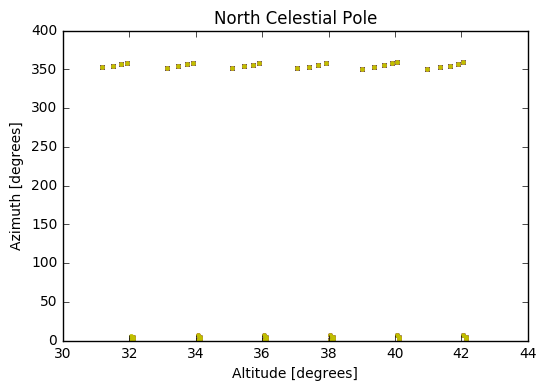

In [101]:
ncp_predict(115, 130, 23, 34, jd0 + 12*hr) # 00:00 + hour(s) 4/25/19

In [107]:
l = np.arange(115, 130, 2)
b = np.arange(23, 34, 2)

ra_dec = []

for i in range(len(l)):
    for j in range(len(b)):
        galactic = SkyCoord(l[i], b[j], frame='galactic', unit='deg')
        icrs = galactic.transform_to('icrs')
        ra = icrs.ra.degree
        dec = icrs.dec.degree
        ra_dec.append([ra, dec])
        
jd0 = 2458598.79167 # 00:00 on April 25, 2019
hr = 1/24

for i in range(len(ra_dec)):
    for j in range(24):
        ra = ra_dec[i][0]
        dec = ra_dec[i][1]
        icrs = SkyCoord(ra, dec, frame='icrs', unit='deg')
        gal = icrs.transform_to('galactic')
        l = gal.l.degree
        b = gal.b.degree
        alt, az = ugradio.coord.get_altaz(ra, dec, jd=jd0+j*hr, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
        if az < 355 and az > 5:
            print 'galactic coordinate', l, b, 'observable at', j
    

galactic coordinate 115.0 23.0 observable at 0
galactic coordinate 115.0 23.0 observable at 1
galactic coordinate 115.0 23.0 observable at 2
galactic coordinate 115.0 23.0 observable at 3
galactic coordinate 115.0 23.0 observable at 4
galactic coordinate 115.0 23.0 observable at 5
galactic coordinate 115.0 23.0 observable at 10
galactic coordinate 115.0 23.0 observable at 11
galactic coordinate 115.0 23.0 observable at 12
galactic coordinate 115.0 23.0 observable at 13
galactic coordinate 115.0 23.0 observable at 14
galactic coordinate 115.0 23.0 observable at 15
galactic coordinate 115.0 23.0 observable at 16
galactic coordinate 115.0 23.0 observable at 17
galactic coordinate 115.0 23.0 observable at 22
galactic coordinate 115.0 23.0 observable at 23
galactic coordinate 115.0 25.0 observable at 0
galactic coordinate 115.0 25.0 observable at 1
galactic coordinate 115.0 25.0 observable at 2
galactic coordinate 115.0 25.0 observable at 3
galactic coordinate 115.0 25.0 observable at 4
gal

### Old Predictions

In [25]:
# Sunday, April 21, 2019

jd0 = 2458594.79167
jd2 = 2458594.87500
jd4 = 2458594.95833
jd6 = 2458595.04167
jd8 = 2458595.12500
jd10 = 2458595.20833
jd12 = 2458595.29167
jd14 = 2458595.37500
jd16 = 2458595.45833
jd18 = 2458595.54167
jd20 = 2458595.62500
jd22 = 2458595.70833
jd24 = 2458595.79167

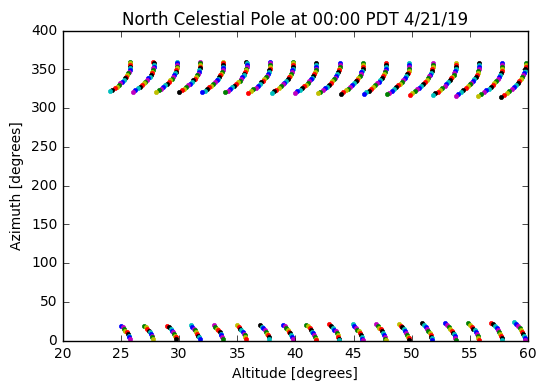

In [29]:
for i in range(len(ra_dec)):
    alt, az = ugradio.coord.get_altaz(ra_dec[i][0], ra_dec[i][1], jd=jd0, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
    plt.plot(alt, az, '.')
    plt.title('North Celestial Pole at 00:00 PDT 4/21/19')
    plt.xlabel('Altitude [degrees]')
    plt.ylabel('Azimuth [degrees]')
plt.show()

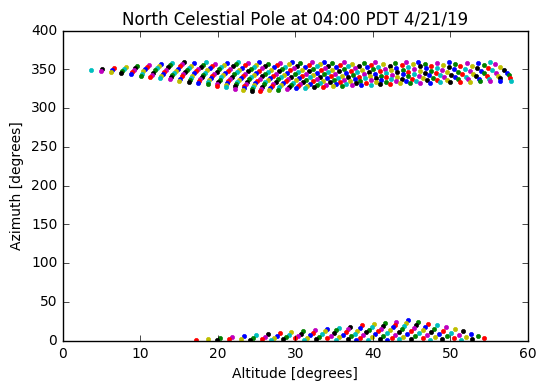

In [30]:
for i in range(len(ra_dec)):
    alt, az = ugradio.coord.get_altaz(ra_dec[i][0], ra_dec[i][1], jd=jd4, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
    plt.plot(alt, az, '.')
    plt.title('North Celestial Pole at 04:00 PDT 4/21/19')
    plt.xlabel('Altitude [degrees]')
    plt.ylabel('Azimuth [degrees]')
plt.show()

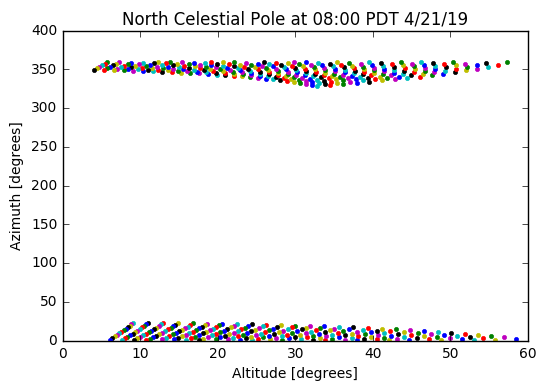

In [31]:
for i in range(len(ra_dec)):
    alt, az = ugradio.coord.get_altaz(ra_dec[i][0], ra_dec[i][1], jd=jd8, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
    plt.plot(alt, az, '.')
    plt.title('North Celestial Pole at 08:00 PDT 4/21/19')
    plt.xlabel('Altitude [degrees]')
    plt.ylabel('Azimuth [degrees]')
plt.show()

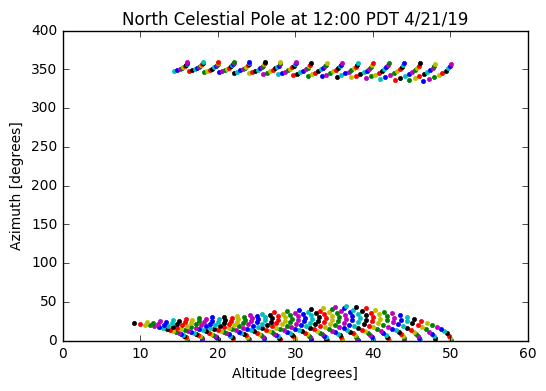

In [32]:
for i in range(len(ra_dec)):
    alt, az = ugradio.coord.get_altaz(ra_dec[i][0], ra_dec[i][1], jd=jd12, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
    plt.plot(alt, az, '.')
    plt.title('North Celestial Pole at 12:00 PDT 4/21/19')
    plt.xlabel('Altitude [degrees]')
    plt.ylabel('Azimuth [degrees]')
plt.show()

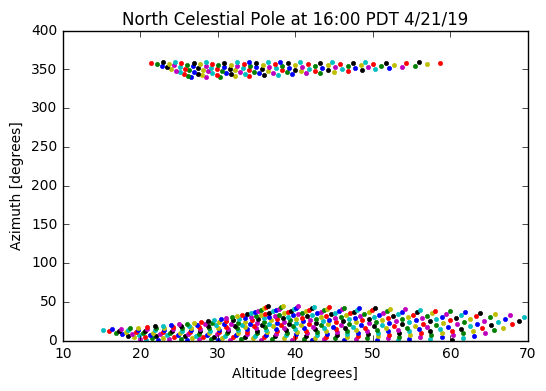

In [33]:
for i in range(len(ra_dec)):
    alt, az = ugradio.coord.get_altaz(ra_dec[i][0], ra_dec[i][1], jd=jd16, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
    plt.plot(alt, az, '.')
    plt.title('North Celestial Pole at 16:00 PDT 4/21/19')
    plt.xlabel('Altitude [degrees]')
    plt.ylabel('Azimuth [degrees]')
plt.show()

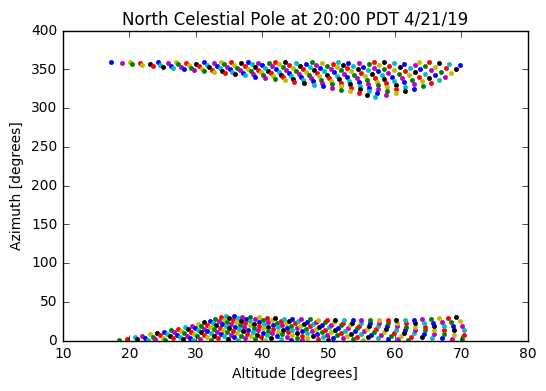

In [34]:
for i in range(len(ra_dec)):
    alt, az = ugradio.coord.get_altaz(ra_dec[i][0], ra_dec[i][1], jd=jd20, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
    plt.plot(alt, az, '.')
    plt.title('North Celestial Pole at 20:00 PDT 4/21/19')
    plt.xlabel('Altitude [degrees]')
    plt.ylabel('Azimuth [degrees]')
plt.show()